# OHLC and Technincal Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
yf.pdr_override()
from datetime import datetime as dt

### Data download

In [2]:
start = "2009-12-30"
end  =  "2018-11-30"
tsla = yf.download('TSLA', start = start, end = end)

[*********************100%***********************]  1 of 1 downloaded


## OHLC using deprecated mpl_finance module

In [4]:
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from mpl_finance import candlestick_ohlc, volume_overlay3    # need to install mpl_finance
import seaborn as sns; sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [5]:
# convert date format for ohlc to operate

data = tsla 

data['Date'] = data.index.map(mdates.date2num)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,733952.0
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,733953.0
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,733954.0
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,733955.0
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,733959.0


In [6]:
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = data

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,733952.0
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,733953.0
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,733954.0
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,733955.0
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,733959.0
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,733960.0
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,733961.0
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,733962.0
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,733965.0


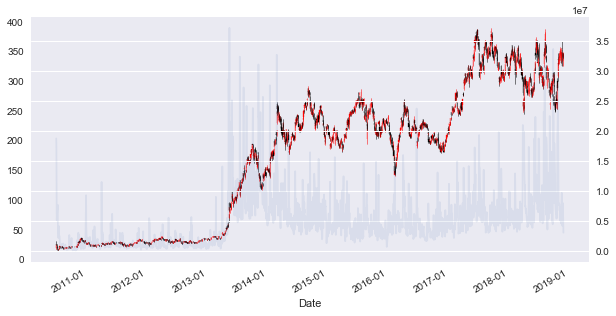

In [8]:
#%matplotlib notebook
%matplotlib inline  
plt.style.use('seaborn')
f1, ax = plt.subplots(figsize = (10,5))

candlestick_ohlc(ax, df[cols].values, width=.6, colorup='red', colordown='black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

df['Volume'].plot(secondary_y=True, alpha=0.1)

## Technical Analysis
-  Technical analysis only uses public information (past prices, trading volume, etcs). Hence it is violated the efficicent market hypothesis if someone adopts TA as an investment tool. However, TA is so popular and widely used as an investment strategy or as machine learning features 

In [10]:
from finta import TA    # need to install 

#### Moving Average(n): 
\begin{align*}
\frac{\sum_{i=1}^{n} P_i }{n}
\end{align*}

In [11]:
?df.ewm

In [12]:
# compute the simple moving average
df['ema20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['ema60'] = df['Close'].ewm(span=60, adjust=False).mean()
df['ema120'] = df['Close'].ewm(span=120, adjust=False).mean()

Text(0.5, 1.0, 'OHLC(TSLA)')

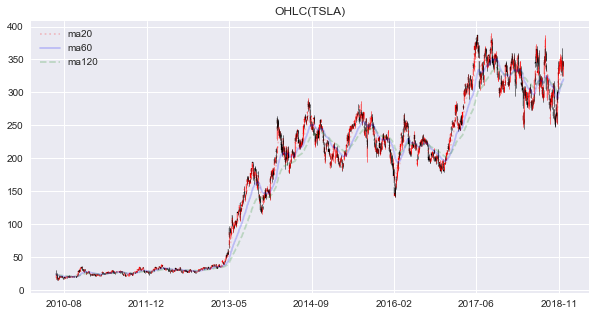

In [14]:
#%matplotlib widget 
#%matplotlib inline 

ticker = 'TSLA'

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, df[cols].values, width=.6, colorup='red', colordown='black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# plot the moving average lines
ax.plot(df.Date, df['ema20'], 'r:', label = 'ma20', alpha=0.2)
ax.plot(df.Date, df['ema60'], 'b-', label = 'ma60', alpha=0.2)
ax.plot(df.Date, df['ema120'], 'g--', label = 'ma120', alpha=0.2)

# other parameters
#ax.grid(False)
ax.legend()
ax.set_title('OHLC' + '({})'.format(ticker))

In [28]:
df['Date'] = data.index.map(mdates.date2num)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,ema20,ema60,ema120
Date,,,,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,733952.0,23.889999,23.889999,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,733953.0,23.884285,23.888032,23.889007
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,733954.0,23.701019,23.824818,23.857123
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,733955.0,23.272351,23.673184,23.780146
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,733959.0,22.590222,23.425211,23.653366


UP TO HERE 

---bugging 


In [43]:
import ta  
import pandas as pd 

ddf = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume",
                                fillna=True)

TypeError: shift() got an unexpected keyword argument 'fill_value'

In [39]:
from ta import *     # need to install ta 
df_ta = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume",
                                fillna=False)

TypeError: shift() got an unexpected keyword argument 'fill_value'

In [23]:
df_ta.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

### Bollinger Bands 

\begin{align*}
BB = MA(n) \pm 2 \sigma
\end{align*}

<IPython.core.display.Javascript object>


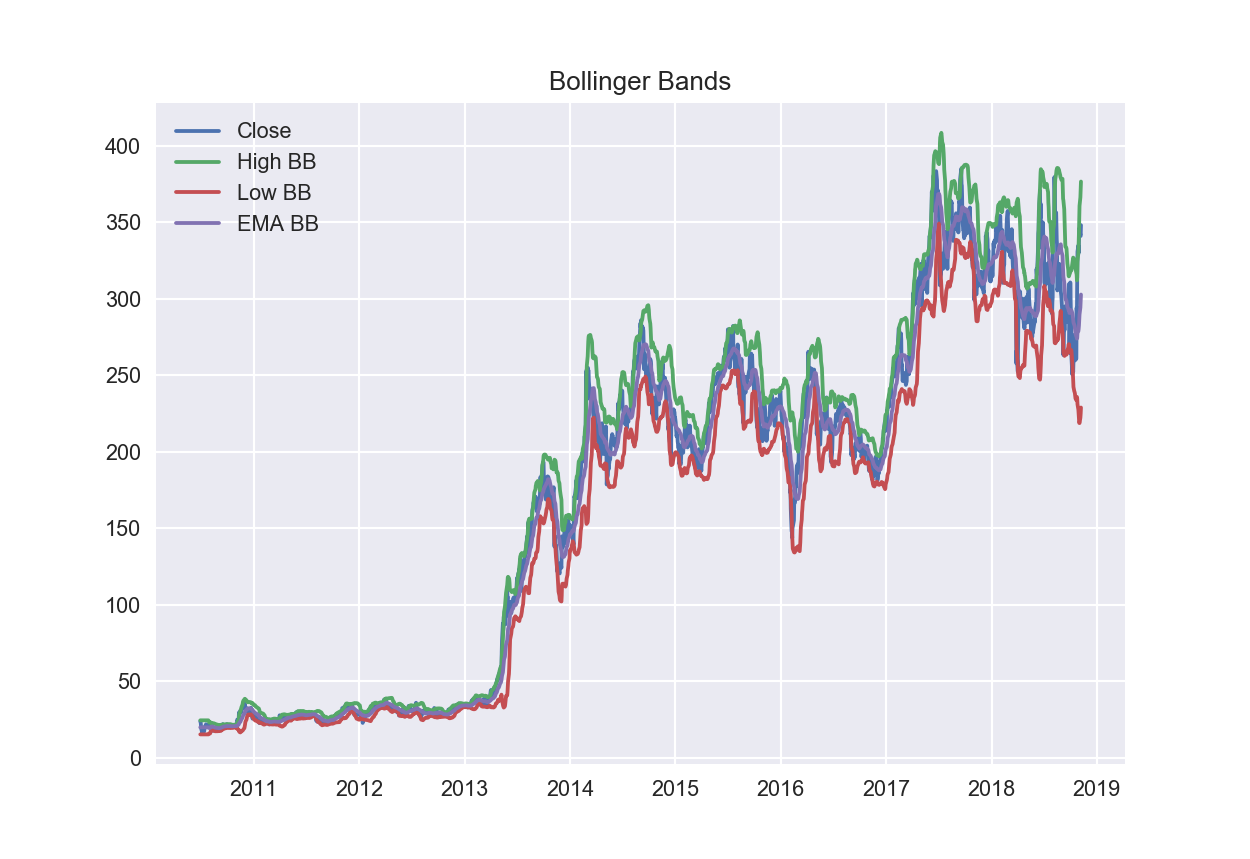

In [18]:
%matplotlib notebook
plt.plot(df_ta.Close)
plt.plot(df_ta.volatility_bbh, label='High BB')
plt.plot(df_ta.volatility_bbl, label='Low BB')
plt.plot(df_ta.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()

In [ ]:
df_plot.head()

<IPython.core.display.Javascript object>


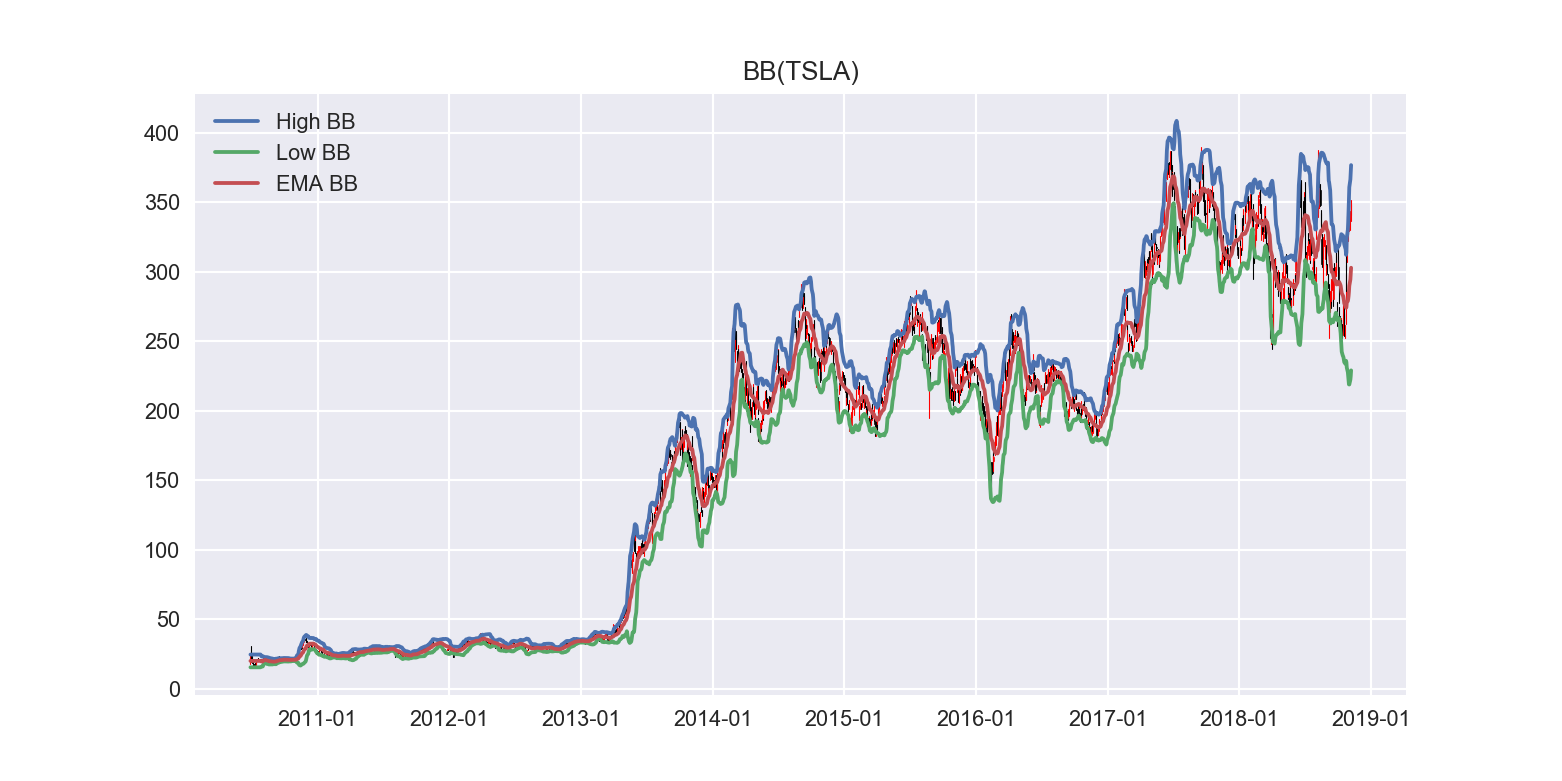

Text(0.5,1,'BB(TSLA)')

In [19]:
#%matplotlib widget 
#%matplotlib inline 

ticker = 'TSLA'

#df_plot = df_ta[-60:]
df_plot = df_ta
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, df_plot[cols].values, width=.6, colorup='red', colordown='black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# plot the Bollinger Bands

ax.plot(df_plot.volatility_bbh, label='High BB')
ax.plot(df_plot.volatility_bbl, label='Low BB')
ax.plot(df_plot.volatility_bbm, label='EMA BB')

# other parameters
#ax.grid(False)
ax.legend()
ax.set_title('BB' + '({})'.format(ticker))

<IPython.core.display.Javascript object>


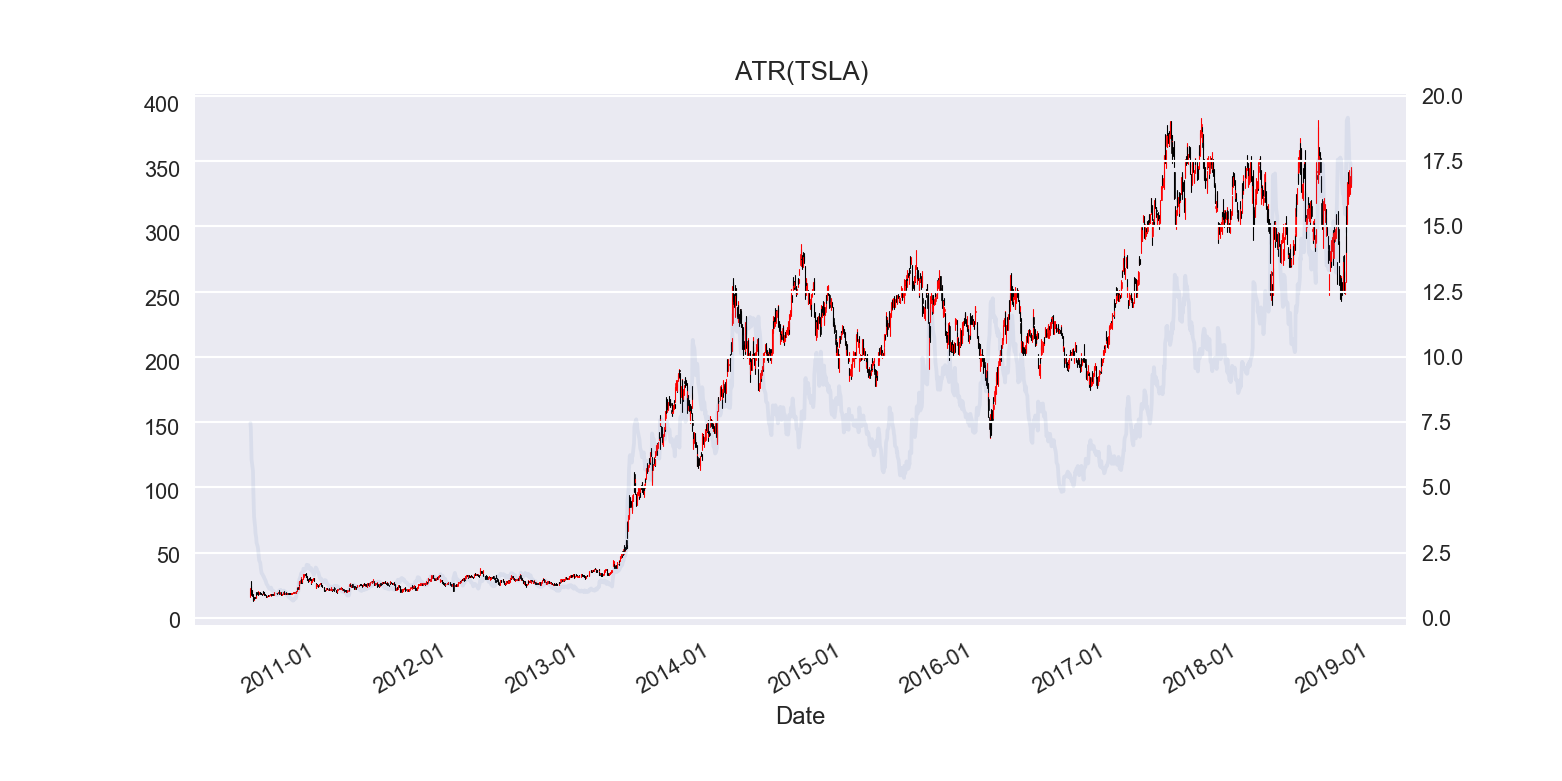

No handles with labels found to put in legend.


Text(0.5,1,'ATR(TSLA)')

In [20]:
#%matplotlib widget 
#%matplotlib inline 

ticker = 'TSLA'

#df_plot = df_ta[-60:]
df_plot = df_ta
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, df[cols].values, width=.6, colorup='red', colordown='black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# plot the Bollinger Bands

df_plot['volatility_atr'].plot(secondary_y=True, alpha=0.1)

# other parameters
#ax.grid(False)
ax.legend()
ax.set_title('ATR' + '({})'.format(ticker))

### Ichimok with closed price
- Kijun-sen (Base Line): (26-period high + 26-period low)/2))
- Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
- Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
- Chikou Span (Lagging Span): Close plotted 26 days in the past

<IPython.core.display.Javascript object>


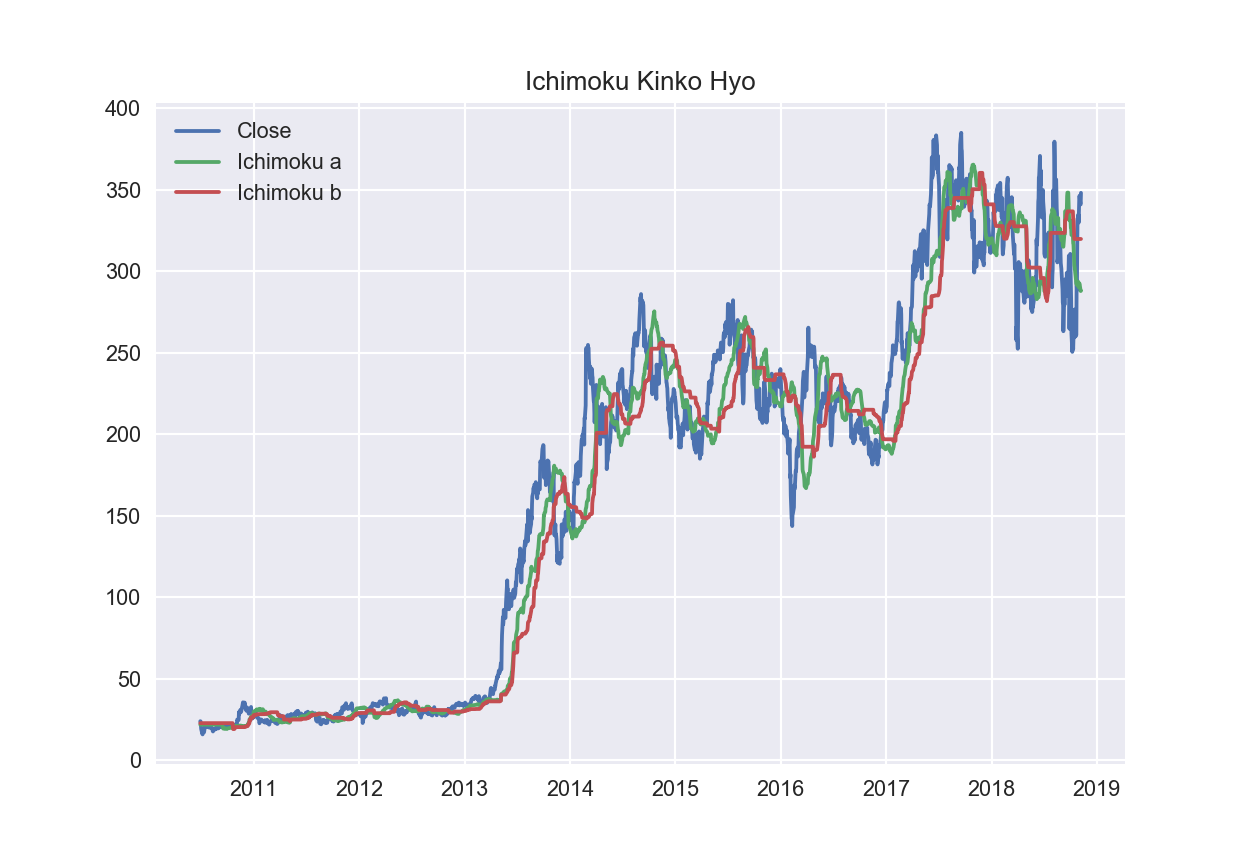

In [21]:
%matplotlib widget
#df_plot = df_ta[-60:]
df_plot = df_ta
plt.plot(df_plot.Close)
plt.plot(df_plot.trend_ichimoku_a, label='Ichimoku a')
plt.plot(df_plot.trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

### Ichimok with OHLC

<IPython.core.display.Javascript object>


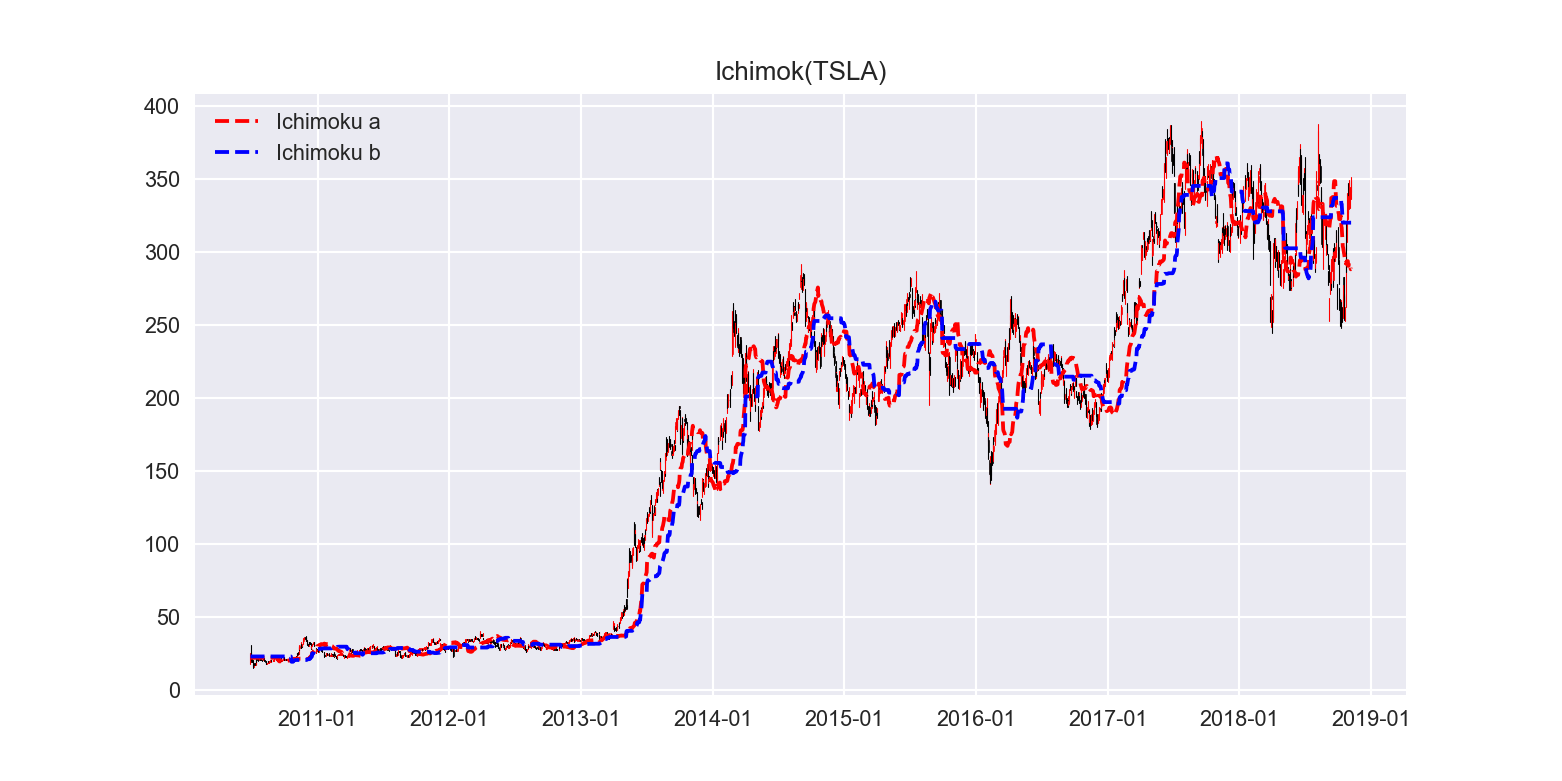

Text(0.5,1,'Ichimok(TSLA)')

In [22]:
#%matplotlib widget 
#%matplotlib inline 

ticker = 'TSLA'

#df_plot = df_ta[-60:]
df_plot = df_ta
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, df[cols].values, width=.6, colorup='red', colordown='black')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# plot Ichimok

ax.plot(df_plot.trend_ichimoku_a, 'r--', label='Ichimoku a')
ax.plot(df_plot.trend_ichimoku_b, 'b--', label='Ichimoku b')


# other parameters
#ax.grid(False)
ax.legend()
ax.set_title('Ichimok' + '({})'.format(ticker))